In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
from toolbox import *
import datetime

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01',
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['BTC', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

In [86]:
# rn = 'BBT_future_Tiingo_ada'
rn = 'BBT_Tiingo'
rm = 'Variance'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

Text(0.5, 1.0, 'BITX')

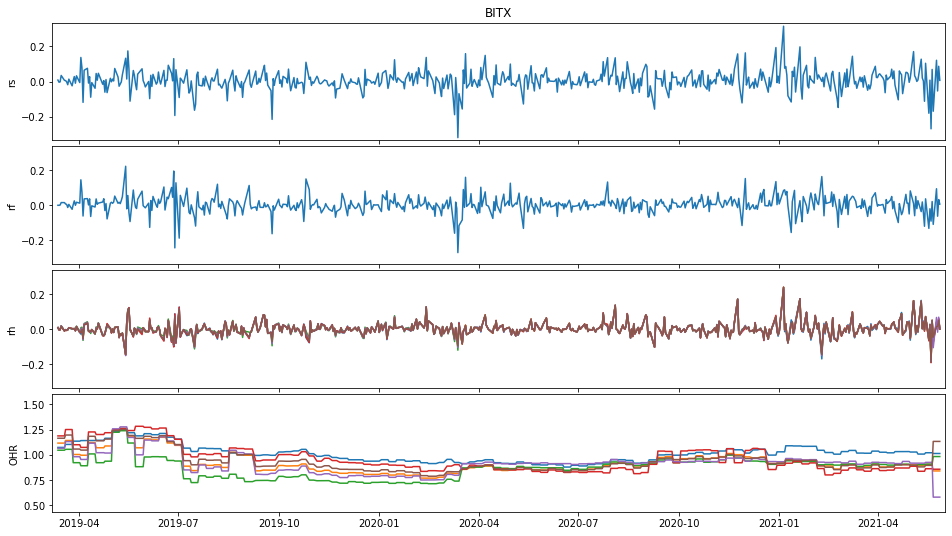

In [128]:
result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']
n = 2
rn = result_names[n]
rm = 'Variance'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

_max = np.max([np.max(df.rs), np.max(df.rf), np.max(df.rh)])
_min = np.min([np.min(df.rs), np.min(df.rf), np.min(df.rh)])

_y = np.max([np.abs(_max), np.abs(_min)])*1.05

fig, ax = plt.subplots(figsize=(16,9),nrows=4, sharex=True)
ax[0].plot(df.Date, df.rs)
ax[1].plot(df.Date, df.rf)

h_max = np.max(df.h)
h_min = np.min(df.h)

for rm in risk_measures[:-1]:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    h_max = np.max([h_max, np.max(df.h)])
    h_min = np.min([h_min, np.min(df.h)])
    
    ax[2].plot(df.Date, df.rh, label=rn)
    ax[3].plot(df.Date, df.h)
    
    
#     ax[2].legend()

# fig.tight_layout()

ax[3].set_ylim((h_min*0.75, h_max*1.25))

ax[0].set_ylabel('rs')
ax[1].set_ylabel('rf')
ax[2].set_ylabel('rh')
ax[3].set_ylabel('OHR')

for i in range(3):
    ax[i].set_ylim((-_y,_y))

start_day = df.Date.iloc[-1]-datetime.timedelta(days=5)
end_day = df.Date.iloc[0]+datetime.timedelta(days=5)

ax[0].set_xlim((start_day, end_day))
    
plt.subplots_adjust(left=None,
                bottom=None, 
                right=None, 
                top=None,
                wspace=None,
                hspace=0.05)

ax[0].set_title(new_coin_names[n])

In [107]:
# Table 1a: Moments, dependency with future, start and end
def summary_statistics(r, rm):
    m1 = np.mean(r)
    m2 = np.std(r)
    m3 = ss.skew(r) 
    m4 = ss.kurtosis(r) 
    _max = np.max(r)
    _min = np.min(r)
    
    _dict = {'m1':m1, 'm2':m2, 'm3':m3, 'm4':m4, 
             'max':_max, 'min':_min}
    
    return pd.DataFrame([_dict], [rm])

In [125]:
rn = 'BBT_future_Tiingo_ltc'
rm = 'Variance'
path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

ss_df = summary_statistics(df.rs, 'Spot')
ss_df = ss_df.append(summary_statistics(df.rf, 'Future'))

for rm in risk_measures[:-1]:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    ss_df=ss_df.append(summary_statistics(df.rh, rm))

ss_df

,m1,m2,m3,m4,max,min
Spot,0.002299,0.063840,-0.636834,4.727317,0.265311,-0.375913
Future,0.004136,0.048971,-0.391219,4.936291,0.222514,-0.269920
Variance,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029
ES q=0.05,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029
ES q=0.01,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029
VaR q=0.05,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029
VaR q=0.01,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029
ERM k=10,-0.002520,0.042772,-0.234736,5.682941,0.177735,-0.283029


In [103]:
start_day = df.Date.iloc[-1]-datetime.timedelta(days=1)
start_day

Timestamp('2019-10-20 20:00:00')

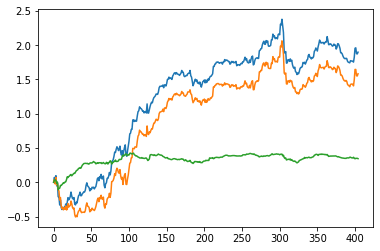

In [82]:
# plt.plot(np.cumsum(df.rs))
# plt.plot(np.cumsum(df.rf))
# plt.plot(np.cumsum(df.rh))